In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# load 2020 world happiness dataset
file_path = Path("Resources/2020.csv")
happiness_2020 = pd.read_csv(file_path)
happiness_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [4]:
# remove unnecessary columsn
happiness_2020_clean = happiness_2020.drop(columns=["Country name", "Ladder score", "Standard error of ladder score", 
                                                    "upperwhisker", "lowerwhisker", "Logged GDP per capita", "Social support", 
                                                    "Healthy life expectancy", "Freedom to make life choices", 
                                                    "Generosity", "Perceptions of corruption", "Ladder score in Dystopia"])
happiness_2020_clean.head()

,Regional indicator,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Western Europe,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Western Europe,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Western Europe,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Western Europe,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Western Europe,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
happiness_2020_clean['Regional indicator'] = LabelEncoder().fit_transform(happiness_2020_clean['Regional indicator'])
happiness_2020_clean

,Regional indicator,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,9,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,9,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,9,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,9,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,9,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...
148,8,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,8,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,8,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,8,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [6]:
# standardize data with StandardScaler
happiness_2020_clean_scaled = StandardScaler().fit_transform(happiness_2020_clean)
print(happiness_2020_clean_scaled[0:5])

[[ 1.24396342  1.12182687  1.20282353  1.05978213  1.4123599  -0.29682885
   3.07948806  1.40713496]
 [ 1.24396342  1.23432523  1.21654488  1.13109632  1.43171282  0.53379876
   3.23387122  0.81956184]
 [ 1.24396342  1.40627109  1.10796527  1.37274594  1.17526106  0.79623216
   2.45930209  0.67275811]
 [ 1.24396342  1.23312124  1.37084422  1.21603151  1.40997207  1.72830145
   0.12262657  0.8693087 ]
 [ 1.24396342  1.49633947  1.18759793  1.2445731   1.4683909   0.9853884
   2.69132099  0.34879326]]


In [15]:
# initialize pca model, reduce from dimensions 7 to 2 
pca = PCA(n_components=2)

# get principal components from the happiness 2020 dataset
happiness_2020_pca = pca.fit_transform(happiness_2020_clean_scaled)

In [16]:
# transform pca to a dataframe
happiness_2020_pca_df = pd.DataFrame(data = happiness_2020_pca, 
                                    columns = ["P1", "P2"])
happiness_2020_pca_df.head()

,P1,P2
0,-2.837777,2.204308
1,-2.996548,2.700981
2,-2.859128,2.355489
3,-2.282542,1.801594
4,-3.053721,2.641006


In [17]:
# explained variance
pca.explained_variance_ratio_

array([0.39291051, 0.218954  ])

C:\Users\anmig\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


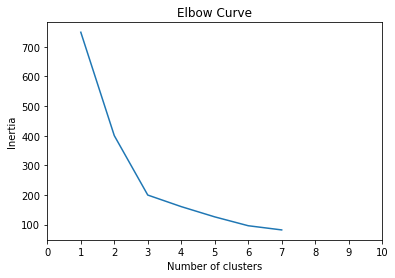

In [18]:
# running k means with PCA data
inertia = []
k = list(range(1, 8))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(happiness_2020_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(happiness_2020_pca_df)

# Predict clusters
predictions = model.predict(happiness_2020_pca_df)

# Add the predicted class column to the dataframe
happiness_2020_pca_df["class"] = model.labels_
happiness_2020_pca_df.head()

,P1,P2,class
0,-2.837777,2.204308,0
1,-2.996548,2.700981,0
2,-2.859128,2.355489,0
3,-2.282542,1.801594,0
4,-3.053721,2.641006,0


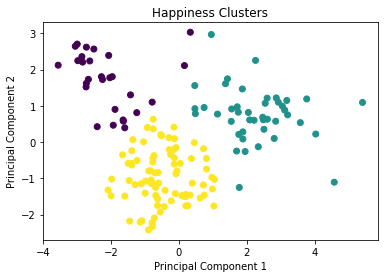

In [20]:
# Visualize the clusters
plt.scatter(x=happiness_2020_pca_df['P1'], \
            y=happiness_2020_pca_df['P2'], \
            c=happiness_2020_pca_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Happiness Clusters')
plt.show()